In [26]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing .image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [31]:
train_ds=train.flow_from_directory("/kaggle/input/dataset/forest_fire/Training and Validation",target_size=(150,150),batch_size=32,class_mode='binary')
test_ds=test.flow_from_directory("/kaggle/input/dataset/forest_fire/Testing",target_size=(150,150),batch_size=32,class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [36]:
# Build CNN Model

model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='leaky_relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='leaky_relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='leaky_relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='leaky_relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='leaky_relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
r=model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 749ms/step - accuracy: 0.7721 - loss: 0.4432 - val_accuracy: 0.9265 - val_loss: 0.2274
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 738ms/step - accuracy: 0.9470 - loss: 0.1496 - val_accuracy: 0.9118 - val_loss: 0.3358
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 746ms/step - accuracy: 0.9503 - loss: 0.1655 - val_accuracy: 0.8971 - val_loss: 0.4258
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 737ms/step - accuracy: 0.9604 - loss: 0.1135 - val_accuracy: 0.9412 - val_loss: 0.1196
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 745ms/step - accuracy: 0.9749 - loss: 0.0900 - val_accuracy: 0.9706 - val_loss: 0.0882


In [67]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict(file):
    img=image.load_img(file,target_size=(150,150))
    plt.imshow(img)
    y=image.img_to_array(img)
    x=np.expand_dims(y,axis=0)
    val=model.predict(x)
    print(val)
    if val == 1:
        plt.xlabel("No Fire", fontsize=50)
        print("No Fire")
    elif val == 0:
        plt.xlabel("Fire", fontsize=50)
        print("Fire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.]]
No Fire


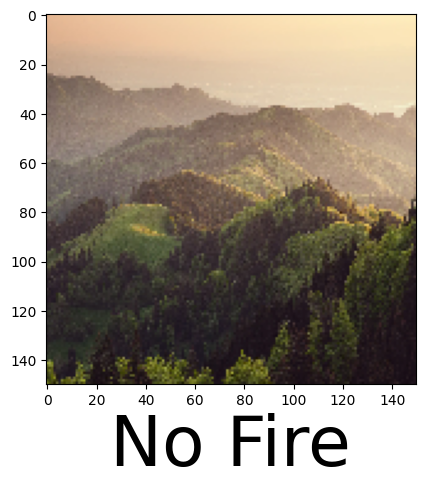

In [68]:
predict("/kaggle/input/testing2/forest.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.]]
Fire


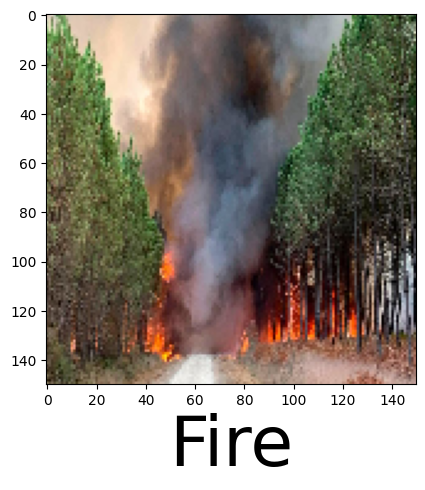

In [69]:
predict("/kaggle/input/testing3/fire_forest.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[1.]]
No Fire


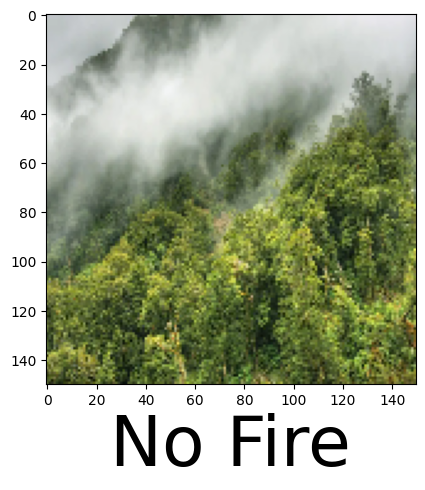

In [70]:
predict("/kaggle/input/testing3/normal forest.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.]]
Fire


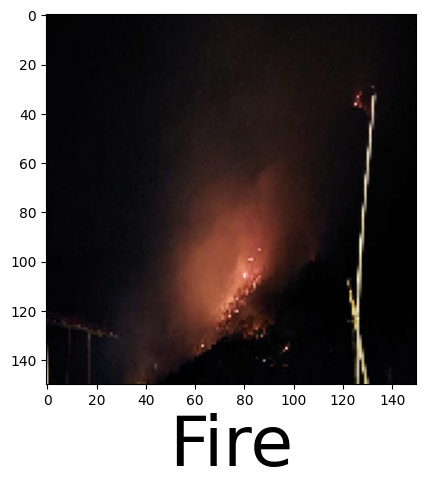

In [73]:
predict("/kaggle/input/fire-picture/fire_pic.jpeg")